In [0]:
# K_NN (K Nearest Neighbour)

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [129]:
data = pd.read_csv("Week9_data.csv")
data.drop(["id","Unnamed: 32"],axis=1,inplace=True)
data.tail()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.256,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.463,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.075,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.595,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,0.3857,1.428,2.548,19.15,0.007189,0.00466,0.00000,0.00000,0.02676,0.002783,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [0]:
# malignant = M  
# benign = B    

M = data[data.diagnosis == "M"]
B = data[data.diagnosis == "B"]

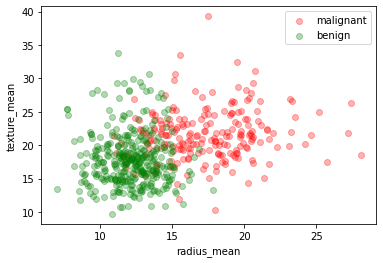

In [131]:
# scatter plot
plt.scatter(M.radius_mean,M.texture_mean,color="red",label="malignant",alpha= 0.3)
plt.scatter(B.radius_mean,B.texture_mean,color="green",label="benign",alpha= 0.3)
plt.xlabel("radius_mean")
plt.ylabel("texture_mean")
plt.legend()
plt.show()

In [0]:
data.diagnosis = [1 if each == "M" else 0 for each in data.diagnosis]
y = data.diagnosis.values
x_data = data.drop(["diagnosis"],axis=1)

In [0]:
# normalization 
x = (x_data - np.min(x_data))/(np.max(x_data)-np.min(x_data))


In [0]:
# train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3,random_state=1)

In [135]:
# knn model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3,metric='euclidean') # n_neighbours = k
knn.fit(x_train,y_train)
prediction = knn.predict(x_test)
print(" {} nn score: {} ".format(3,knn.score(x_test,y_test)))

 3 nn score: 0.9532163742690059 


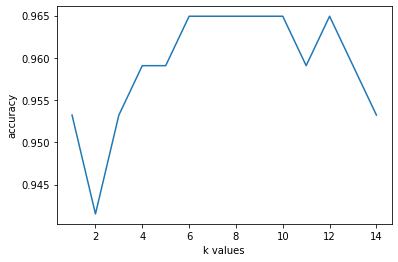

In [136]:
# find k value
score_list = []
for each in range(1,15):
    knn2 = KNeighborsClassifier(n_neighbors = each)
    knn2.fit(x_train,y_train)
    score_list.append(knn2.score(x_test,y_test))
    
plt.plot(range(1,15),score_list)
plt.xlabel("k values")
plt.ylabel("accuracy")
plt.show()

In [0]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [0]:
def plot_decision_regions(X, y, classifier,test_idx=None, resolution=0.02):
   # setup marker generator and color map
   markers = ('s', 'x', 'o', '^', 'v')
   colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
   cmap = ListedColormap(colors[:len(np.unique(y))])

   # plot the decision surface
   x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
   x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
   xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
   np.arange(x2_min, x2_max, resolution))
   Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
   Z = Z.reshape(xx1.shape)
   plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
   plt.xlim(xx1.min(), xx1.max())
   plt.ylim(xx2.min(), xx2.max())
   # plot all samples
   X_test, y_test = X[test_idx, :], y[test_idx]
   for idx, cl in enumerate(np.unique(y)):
      plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
               alpha=0.8, c=cmap(idx),
               marker=markers[idx], label=cl)
   # highlight test samples
   if test_idx:
      X_test, y_test = X[test_idx, :], y[test_idx]
      plt.scatter(X_test[:, 0], X_test[:, 1], c='',
               alpha=1.0, linewidth=1, marker='o',
               s=55, label='test set')


In [0]:
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.fit_transform(X_test)

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


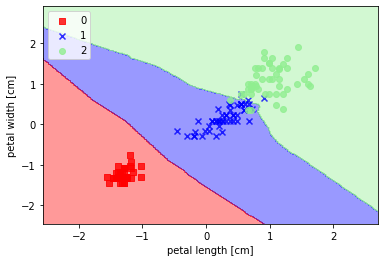

In [141]:
knn = KNeighborsClassifier(n_neighbors=5, p=2,
                           metric='euclidean')
knn.fit(X_train_std, y_train)



plot_decision_regions(X_combined_std, y_combined,
                      classifier=knn,test_idx=None)

plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.show()

In [0]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_distances
from sklearn.metrics.pairwise import cosine_similarity
titles = [
    'A New Hope',
    'The Empire Strikes Back',
    'Return of the Jedi',
    'The Phantom Menace',
    'Attack of the Clones',
    'Revenge of the Sith',
    'The Force Awakens',
    'The Last Jedi',
    'The Rise of Skywalker',
    ]

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(titles)
cd_title = cosine_distances(X)
cs_title = cosine_similarity(X)


In [143]:
print(cd_title)

[[0.         1.         1.         1.         1.         1.
  1.         1.         1.        ]
 [1.         0.         0.75       0.71132487 0.75       0.75
  0.71132487 0.71132487 0.75      ]
 [1.         0.75       0.         0.71132487 0.5        0.5
  0.71132487 0.42264973 0.5       ]
 [1.         0.71132487 0.71132487 0.         0.71132487 0.71132487
  0.66666667 0.66666667 0.71132487]
 [1.         0.75       0.5        0.71132487 0.         0.5
  0.71132487 0.71132487 0.5       ]
 [1.         0.75       0.5        0.71132487 0.5        0.
  0.71132487 0.71132487 0.5       ]
 [1.         0.71132487 0.71132487 0.66666667 0.71132487 0.71132487
  0.         0.66666667 0.71132487]
 [1.         0.71132487 0.42264973 0.66666667 0.71132487 0.71132487
  0.66666667 0.         0.71132487]
 [1.         0.75       0.5        0.71132487 0.5        0.5
  0.71132487 0.71132487 0.        ]]


In [144]:
print(cs_title)

[[1.         0.         0.         0.         0.         0.
  0.         0.         0.        ]
 [0.         1.         0.25       0.28867513 0.25       0.25
  0.28867513 0.28867513 0.25      ]
 [0.         0.25       1.         0.28867513 0.5        0.5
  0.28867513 0.57735027 0.5       ]
 [0.         0.28867513 0.28867513 1.         0.28867513 0.28867513
  0.33333333 0.33333333 0.28867513]
 [0.         0.25       0.5        0.28867513 1.         0.5
  0.28867513 0.28867513 0.5       ]
 [0.         0.25       0.5        0.28867513 0.5        1.
  0.28867513 0.28867513 0.5       ]
 [0.         0.28867513 0.28867513 0.33333333 0.28867513 0.28867513
  1.         0.33333333 0.28867513]
 [0.         0.28867513 0.57735027 0.33333333 0.28867513 0.28867513
  0.33333333 1.         0.28867513]
 [0.         0.25       0.5        0.28867513 0.5        0.5
  0.28867513 0.28867513 1.        ]]
